In [62]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# Levanto dataset
url = 'https://raw.githubusercontent.com/xlisouski/DataCoder/main/train.csv'
df = pd.read_csv(url, sep = ',')

In [64]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Histogramas

## Tipo de variable: numérica

El histograma es una técnica gráfica utilizada para presentar gran cantidad de datos. Se le atribuye a Karl Pearson en 1895. El histograma puede ser: de **frecuencias absolutas, de frecuencias relativas, de frecuencias absolutas acumuladas y de frecuencias relativas acumuladas**. Para la construcción del histograma se requiere elaborar una tabla de distribución de frecuencias, lo cual se desarrollará a continuación.

El gráfico de la distribución de frecuencias, se llama histograma. El histograma de frecuencias es una representación visual de los datos en donde se evidencian fundamentalmente tres características: **forma, acumulación o tendencia posicional y dispersión o variabilidad**.

El histograma (de frecuencias) en si es una sucesión de rectángulos construidos sobre un sistema de coordenadas de la siguiente manera:

1. Las bases de los rectángulos se localizan en el eje horizontal. La longitud de la base es igual al ancho del intervalo.
2. Las alturas de los rectángulos se registran sobre el eje vertical y corresponden a las frecuencias de los intervalos.
3. Las áreas de los rectángulos son proporcionales a las frecuencias de las clases.

$$k= 1 + 3.3 log_{10} (n)$$


## Variable de ejemplo a estudiar
A los efectos de presentar un ejemplo estudiaremos la variable **LotArea**

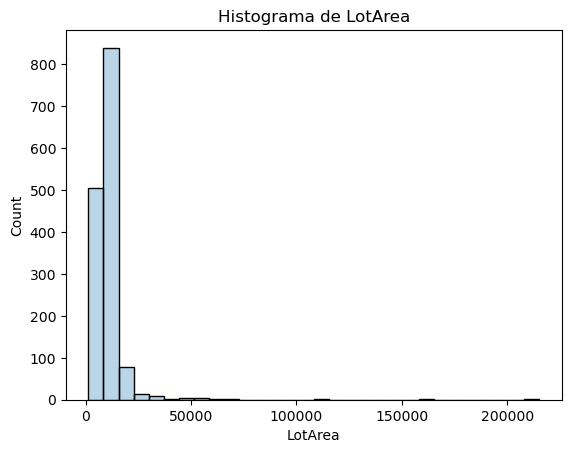

In [65]:
# Histograma con frecuencias absolutas 
sns.histplot(df['LotArea'], 
             kde = False,
             bins = 30,            
             alpha = 0.3) 
plt.title('Histograma de LotArea')
plt.show()

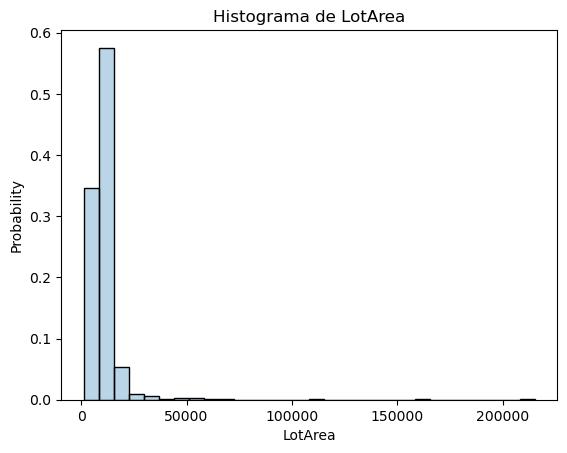

In [66]:
# Histograma con frecuencias relativas 
sns.histplot(df['LotArea'], 
             kde = False,
             bins = 30,            
             alpha = 0.3,
             stat = 'probability') 
plt.title('Histograma de LotArea')
plt.show()

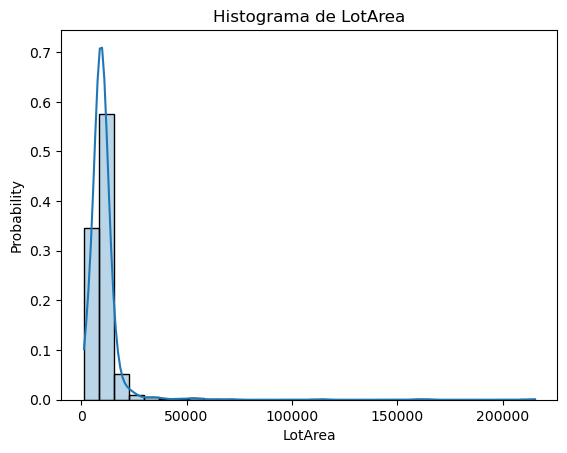

In [67]:
# Histograma con curva de densidad 
sns.histplot(df['LotArea'], 
             kde = True,
             bins = 30,            
             alpha = 0.3,
             stat = 'probability') 
plt.title('Histograma de LotArea')
plt.show()

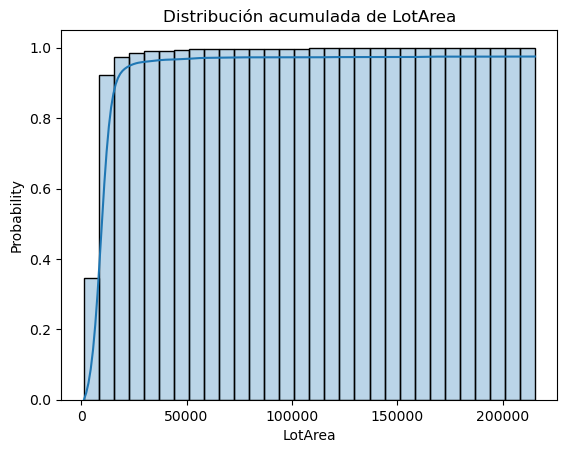

In [68]:
# Histograma con curva de densidad de frecuencias acumuladas
sns.histplot(df['LotArea'], 
             kde = True,
             bins = 30,            
             alpha = 0.3,
             stat = 'probability',
             cumulative = True) 
plt.title('Distribución acumulada de LotArea')
plt.show()

# Boxplots

In [69]:
# Boxplot con Plotly
import plotly.express as px
fig = px.box(df, x="LotArea")
fig.show()

# Medidas de tendencia central 

1. **Media** 
$$\bar{x} =\frac{\sum_{i=1}^n x_i}{n}$$

    Para el caso de datos discretos agrupados:

$$\bar{x} =\sum_j x_j fr(x_j)$$

Para datos agrupados en clases, la media se calcula suponiendo que todos los datos de cada clase son idénticos al centro de la clase, con lo que, llamando mj a estos valores centrales y fr (mj) a la frecuencia relativa de la clase j, la fórmula se reduce a:

$$\bar{x} =\sum_j m_j fr(m_j)$$

2. **Media geometrica**
    <br>Se calcula multiplicando todos los valores y luego tomando la raíz enésima del producto, donde "n" es el número total de valores en el conjunto de datos.
    <br>Se utiliza en finanzas para calcular tasas de rendimiento promedio, en ciencias naturales para analizar crecimiento exponencial o promedios de tasas de cambio, y en otras áreas donde se requiere calcular un promedio de valores multiplicativos.
    <br>Admite solo valores NO negativos. 

$$B=\sqrt{x_1 *x_2 *\dots* x_n}$$

3. **Media armonica**
    <br>Se calcula dividiendo el número de elementos por la suma de los inversos de los valores individuales. 
    <br>Es útil cuando se tienen datos que están inversamente relacionados entre sí. Por ejemplo, cuando se trata de velocidades y tiempos, si los datos muestran una relación inversa (como el tiempo necesario para recorrer una distancia a cierta velocidad), la media armónica puede ser más representativa.

$$C= \frac{n}{\sum_{i=1}^n \frac{1}{x_i}}$$


4. **Media recortada** 
    <br>Es simplemente la media removiendo en la parte inferior y superior de los datos ordenados cierto porcentaje de los datos 
    <br>

5. **Mediana y moda**
    <br>La mediana es un valor tal que, ordenados en magnitud los datos, el 50% es menor que ella y el 50% mayor. 
    <br>Por tanto, al ordenar los datos sin agrupar, la mediana es el valor central, si su número es impar, o la media de los dos centrales, si hay un número par.
    <br>
    <br>Para datos agrupados discretos se toma como mediana el valor xm tal que
$$fr(x\leq x_a) <0.5$$
$$fr(x\leq x_b) >0.5$$

    <br>La moda simplemente es el valor mas frecuente

# Usando la librería scipy

In [70]:
import scipy 
scipy.stats.describe(df['LotArea'])

DescribeResult(nobs=1460, minmax=(1300, 215245), mean=10516.828082191782, variance=99625649.65034176, skewness=12.195142125084478, kurtosis=202.5437927513529)

In [71]:
# Media
df['LotArea'].mean()

10516.828082191782

In [72]:
# Media geometrica
scipy.stats.gmean(df['LotArea']) 

9052.880193663315

In [73]:
# Media armonica
scipy.stats.hmean(df['LotArea']) 

7806.604057584135

In [74]:
# Media recortada
scipy.stats.trim_mean(df['LotArea'],0.1)

9563.284246575342

In [75]:
# Moda
scipy.stats.mode(df['LotArea'])

C:\Users\usernosis\AppData\Local\Temp\ipykernel_16028\2203074221.py:2: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



ModeResult(mode=array([7200], dtype=int64), count=array([25]))

In [76]:
# Mediana
df['LotArea'].median()

9478.5

# Medidas de dispersion

1. **Desviacion tipica** 

    <br>Promedio de las desviaciones de los datos respecto a la medida de centralización

$$s=\sqrt{\frac{\sum_{i=1}^n (x_i -\bar{x})^2}{n-1}}$$

    Para datos agrupados es:

$$s=\sqrt{\sum_{i=1}^n (x_i -\bar{x})^2 fr(x_i)}$$


2. **Coeficiente de variacion**

    <br>El coeficiente de variación es una medida relativa de variabilidad. Un CV más alto indica una mayor dispersión relativa en comparación con la media, mientras que un CV más bajo indica una dispersión menor en relación con la media.

    * **CV < 0.2:** Datos homogéneos
    * **CV < 0.5:** Datos moderadamente heterogéneos
    * **CV > 0.5:** Datos muy heterogéneos
<br>

3. **Mediana de las desviaciones absolutas**
    <br>La mediana de las desviaciones absolutas (MEDA) que tiene la ventaja, como la mediana, de no verse afectada por datos extremos.

$$MEDA= median|X_t - Mediana| $$

4. **Rango** 
<br>Se denomina rango o recorrido de una variable la diferencia entre su valor máximo y mínimo

$$Rango = Max(X)- Min(X)$$


5. **Percentil** 
    <br>Llamaremos percentil p al menor valor superior al $p%$ de los datos. 
    <br> 

6.  **Cuartiles** 
    <br>Llamaremos cuartiles a aquellos valores que dividen la distribución en cuatro partes iguales. 
    <br> El primer cuartil, Q1, es por definición igual al percentil 25, el segundo es la mediana y el tercero, Q3, el percentil 75, los percentiles y los cuartiles se utilizan para construir medidas de dispersión basadas en los datos ordenados, como el **rango intercuartílico (IQR)**, que es la diferencia entre los percentiles 75 y 25.

$$IQR= P_{75} -P_{25}$$

7. **Error estandar**
    <br>Desviación estándar de la muestra dividida por la raíz cuadrada del tamaño de la muestra (suponiendo la independencia estadística de los valores de la muestra).
    <br>Un error estándar más pequeño indica que la media muestral es una estimación más precisa de la verdadera media poblacional, mientras que un error estándar más grande indica mayor incertidumbre en la estimación.

$$SE= \frac{\sigma}{\sqrt{n}}$$


In [37]:
# Varianza
df['LotArea'].var()

99625649.6503417

In [77]:
# Desvio muestral
np.std(df['LotArea'], ddof=1)

9981.264932379147

In [78]:
# Desvio poblacional
np.std(df['LotArea'], ddof=0)

9977.846105448101

In [79]:
# Coeficiente de variación
scipy.stats.variation(df['LotArea'])

0.9487505194026763

In [80]:
# Coeficiente de variación a mano
np.std(df['LotArea'], ddof=0)/df['LotArea'].mean()

0.948750519402676

In [47]:
# Rango intercuartílico
scipy.stats.iqr(df['LotArea'])

4048.0

In [48]:
# Error estándar
scipy.stats.sem(df['LotArea']) 

261.221642165902

In [49]:
# Cuartiles 
primer_cuartil = df['LotArea'].quantile(0.25)
tercer_cuartil = df['LotArea'].quantile(0.75)

# Deciles
primer_decil = df['LotArea'].quantile(0.1)

# Percentiles
primer_pecentil = df['LotArea'].quantile(0.01)

# Medidas de asimetria y kurtosis

Estas medidas informan sobre dos aspectos importantes de la forma de
la distribución: su grado de asimetría y su grado de homogeneidad. Al ser
medidas de forma, no dependen de las unidades de medida de los datos

**Asimetria** En un conjunto de datos simétricos respecto a su media $\bar{x}$, la suma $\sum (x-\bar{x})^3$ será nula, mientras que con datos asimétricos esta suma crecerá con la asimetría.
Para obtener una medida adimensional, se define el coeficiente de
asimetría mediante:

$$CA=\frac{\sum_{i=1}^n (x_i -\bar{x})^3}{ns^3}$$

Donde s es la desviación típica.

El signo del coeficiente de asimetría indica la forma de la distribución. 
1. Si este coeficiente es negativo, la distribución se alarga para valores inferiores a la media

2. Si el coeficiente es positivo, la cola de la distribución se extiende para valores superiores a la media

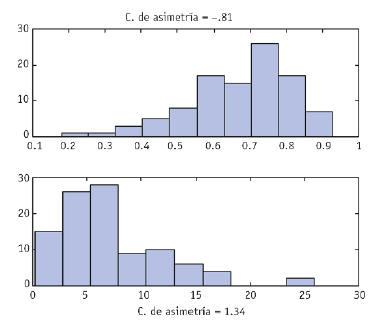


**Kurtosis** 
    <br>Es una característica de como la frecuencia relativa se reparte entre el centro y los extremos


$$CA_p=\frac{\sum_{i=1}^n (x_i -\bar{x})^4}{ns^4}$$

<br>
    <br>Este coeficiente es siempre mayor o igual que uno. El coeficiente de curtosis es importante porque nos informa respecto a la heterogeneidad de la distribución.
    
* **Kurtosis = 3:** Distribución normal
    * **Kurtosis > 3:** Colas más pesadas o una mayor concentración de datos en comparación con una distribución normal. En una distribución leptocúrtica, hay más datos en las colas y la distribución puede tener picos más pronunciados alrededor de la media, lo que sugiere una mayor probabilidad de observaciones extremas
    * **Kurtosis < 3:** Colas más ligeras o una menor concentración de datos en comparación con una distribución normal. En una distribución platicúrtica, la dispersión de los datos hacia las colas es menor, lo que sugiere una probabilidad relativamente menor de observaciones extremas y una mayor uniformidad en la distribución.

In [81]:
# Coeficiente de asimetría 
scipy.stats.skew(df['LotArea']) 

12.195142125084478

In [51]:
# Coeficiente de kurtosis
scipy.stats.kurtosis(df['LotArea'])

202.5437927513529